In [13]:
from modelzipper.tutils import *
import re
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

data_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/results/q3_inf_diff_pos/Meta-Llama-3.1-8B-Instruct"
all_files = auto_read_dir(data_dir)

tokenizer = AutoTokenizer.from_pretrained('/data/zecheng/hf_models/Meta-Llama-3.1-8B-Instruct')

number of files with prefix '' and suffix '': 600


In [ ]:
pattern = r"_len_(\d+)_combination_(\d+_\d+_\d+)_"

all_detected_tokens = {'success': dict(), 'fail': dict()}
for file_name in all_files:
    match = re.search(pattern, file_name)
    ctx_length = int(match.group(1)) 
    combination = tuple(map(int, match.group(2).split('_')))

    file_path = os.path.join(data_dir, file_name)
    content = auto_read_data(file_path)

    score, detected_evidences = content['score'], content['detected_evidences']

    detected_token_id = tokenizer(detected_evidences, return_tensors='pt')['input_ids'].squeeze(0).tolist()

    if score == 0:
        for token_id in detected_token_id:
            token = tokenizer.decode(token_id)
            if token not in all_detected_tokens['fail']:
                all_detected_tokens['fail'][token] = 0
            all_detected_tokens['fail'][token] += 1
    else:
        for token_id in detected_token_id:
            token = tokenizer.decode(token_id)
            if token not in all_detected_tokens['success']:
                all_detected_tokens['success'][token] = 0
            all_detected_tokens['success'][token] += 1

success_dict = sorted(all_detected_tokens['success'].items(), key=lambda x: x[1], reverse=True)

fail_dict = sorted(all_detected_tokens['fail'].items(), key=lambda x: x[1], reverse=True)

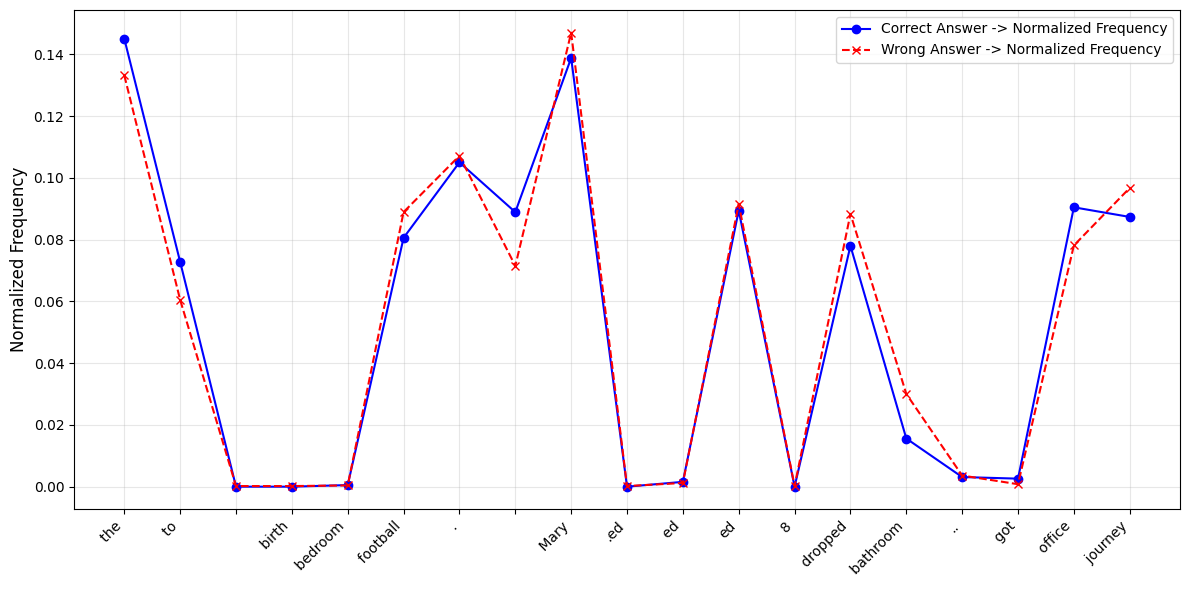

In [19]:
# 转换为字典形式
success_dict = dict(success_dict)
fail_dict = dict(fail_dict)

# 获取 token 的并集
all_tokens = set(success_dict.keys()).union(set(fail_dict.keys()))

# 构建完整的频率表
succ_counts = [success_dict.get(token, 0) for token in all_tokens]
fail_counts = [fail_dict.get(token, 0) for token in all_tokens]

# 归一化
total_succ_count = sum(succ_counts)
total_fail_count = sum(fail_counts)

succ_normalized_counts = [count / total_succ_count if total_succ_count > 0 else 0 for count in succ_counts]
fail_normalized_counts = [count / total_fail_count if total_fail_count > 0 else 0 for count in fail_counts]

plt.figure(figsize=(12, 6))
x_ticks = list(all_tokens)

plt.plot(range(len(x_ticks)), succ_normalized_counts, marker='o', linestyle='-', color='b', label="Correct Answer -> Normalized Frequency")
plt.plot(range(len(x_ticks)), fail_normalized_counts, marker='x', linestyle='--', color='r', label="Wrong Answer -> Normalized Frequency")

plt.xticks(range(len(x_ticks)), x_ticks, rotation=45, ha="right", fontsize=10)
# plt.xlabel("Tokens", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
# plt.title("Comparison of Normalized Frequencies (Success vs Fail)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# 显示图例
plt.legend()

# 显示图像
plt.show()


In [12]:
fail_dict

[(' Mary', 734),
 (' the', 665),
 ('.', 535),
 (' journey', 483),
 ('ed', 457),
 (' football', 444),
 (' dropped', 441),
 (' office', 390),
 (' ', 357),
 (' to', 302),
 (' bathroom', 150),
 ('..', 18),
 (' ed', 6),
 (' got', 4),
 (' bedroom', 2)]

In [44]:
content['dataset'][3]['input'] == content['dataset'][0]['input']

False

In [45]:
content['dataset'][3]

{'input': 'Sandra went to the garden. "Yes," replied Dagobert, making a sign of intelligence to the orphans,\n"we have lots to tell you for a fortnight to come; and among other\nthings, how we chanced to meet with Gabriel. All I can now say is that,\nin his way, he is quite as good as my boy (I shall never be tired of\nsaying\'my boy\'); and they ought to love each other like brothers. Oh, my\nbrave, brave wife!" said Dagobert, with emotion, "you did a good thing,\npoor as you were, taking the unfortunate child--and bringing him up with\nyour own." "Don\'t talk so much about it, my dear; it was such a simple thing." "You are right; but I\'ll make you amends for it by and by. \'Tis down to\nyour account; in the mean time, you will be sure to see him to-morrow\nmorning." cried the blacksmith; "who\'ll say, after\nthis, that there are not days set apart for happiness? How came you to\nmeet him, father?" "I\'ll tell you all, by and by, about when and how we met Gabriel; for if\nyou expect 